In [1]:
#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [12]:
df = pd.read_excel('C:/Users/DELL/Desktop/Ghuwahati_data.xlsx')

In [13]:
df.head()

,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,West,Jalukbari,26.1426,91.6435,20555,Guwahati,26872
1,West,Ferryghat Colony,26.1859,91.7216,72045,Guwahati,10123
2,West,Maligaon,26.1504,91.6960,26456,Guwahati,32343
3,West,Adabari,26.1686,91.6779,21421,Guwahati,29123
4,West,Kamakhya Town,26.1659,91.7074,18623,Guwahati,30345


Creating population and income dataframe from the main dataframe

In [14]:
ghy_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [15]:
ghy_population.head()

,Borough,Neighborhoods,Population
0,West,Jalukbari,20555
1,West,Ferryghat Colony,72045
2,West,Maligaon,26456
3,West,Adabari,21421
4,West,Kamakhya Town,18623


In [16]:
ghy_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [17]:
ghy_income.head()

,Borough,Neighborhoods,AverageIncome
0,West,Jalukbari,26872
1,West,Ferryghat Colony,10123
2,West,Maligaon,32343
3,West,Adabari,29123
4,West,Kamakhya Town,30345


In [18]:
ghy_latitude = df['Latitude'].mean()
ghy_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Guwahati are : ",ghy_latitude,ghy_longitude)

Latitude and Longitude of Guwahati are :  26.159679166666667 91.75953333333332


In [19]:
CLIENT_ID = 'GRQOFDFH1THOHI0ETHV0PJG0WY4U2VEGPDFEJI3NXPLX54VI'
CLIENT_SECRET = 'WVHMY5MIYSWRTFESNKT3IEXVUNCVYLATUD0FJF5K1HDAVCEI'
VERSION = '20180606'
LIMIT = 150

In [20]:
unique_boroughs_of_ghy = df['Borough'].unique().tolist()

In [21]:
unique_boroughs_of_ghy

['West', 'North', 'Dispur', 'South', 'Lakhra', 'DIspur', 'North ', 'East']

In [22]:
borough_colors ={}
for i in unique_boroughs_of_ghy:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [23]:
borough_colors

{'West': '#24D403',
 'North': '#5F4F9E',
 'Dispur': '#3C1E00',
 'South': '#203807',
 'Lakhra': '#B5167B',
 'DIspur': '#60FE7E',
 'North ': '#CE5EC8',
 'East': '#7D9413'}

In [36]:
ghy_map = folium.Map(location=[ghy_latitude,ghy_longitude],zoom_start=12,control_scale=True)

In [37]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(ghy_map)

In [38]:
ghy_map

### Exploring bangalore Neighborhoods using FourSquare API

In [39]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [40]:
ghy_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Jalukbari
Fetching venues for :  Ferryghat Colony
Fetching venues for :  Maligaon 
Fetching venues for :  Adabari
Fetching venues for :  Kamakhya Town
Fetching venues for :  Gotanagar
Fetching venues for :  Madhav Nagar Gosala
Fetching venues for :  Bharalamukh
Fetching venues for :  Santipur Hillside
Fetching venues for :  Dhirenpara, Dhalbama, Betkuchi
Fetching venues for :  Ambari Fatasil
Fetching venues for :  Barsapara
Fetching venues for :  Dakhingaon, Jyotikuchi, Katabari
Fetching venues for :  Saru Sajai
Fetching venues for :  Someswar Chowdhury Road, Athgaon
Fetching venues for :  Bishnupur Colony, Gopinath Nagar, Natunbasti
Fetching venues for :  Kahilipara
Fetching venues for :  Kamal Nagar Hills, Jaynagar, Birubari
Fetching venues for :  Dispur, Ganeshguri, Chrishtianbasti
Fetching venues for :  Rupnagar, Birubari, Udaypur Area
Fetching venues for :  A.K. Road, Rehabari
Fetching venues for :  Tokobari, GauriyaMath, KrishnaNagar
Fetching venues for :  

In [41]:
print("Total number of venues found in Guwahati are : ",ghy_venues.shape[0])

Total number of venues found in Guwahati are :  109


In [42]:
ghy_venues.head()

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Maligaon,West,26.1504,91.6960,Goshala Bazaar Maligaon,26.150406,91.695621,Flea Market
1,Kamakhya Town,West,26.1659,91.7074,Kamakhya View Point,26.162372,91.705112,Scenic Lookout
2,Gotanagar,West,26.1420,91.6773,Radisson Blu,26.141747,91.673764,Hotel
3,Gotanagar,West,26.1420,91.6773,Hemalata Dhaba,26.140271,91.675350,Diner
4,Gotanagar,West,26.1420,91.6773,Cafe b you,26.141835,91.673881,Buffet


In [43]:
ghy_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Clothing Store          7
Pizza Place             6
Bakery                  5
Coffee Shop             4
Chinese Restaurant      4
Fast Food Restaurant    4
Café                    4
Boutique                4
Hotel                   4
Indian Restaurant       3
Name: Neighborhood, dtype: int64

In [44]:
print("Total number of unique categories in Guwahati are : ",len(ghy_venues['Venue Category'].unique()))

Total number of unique categories in Guwahati are :  56


#### Getting number of venues per neighborhood

In [45]:
individual_ghy_venue_count = ghy_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [46]:
individual_ghy_venue_count

Borough
Borough Neighborhood                                          
DIspur  Kharguli, Satpukhuri, Uzanbazar                      4
Dispur  A.K. Road, Rehabari                                  3
        Dakhingaon, Jyotikuchi, Katabari                     1
        Kamal Nagar Hills, Jaynagar, Birubari                2
        Latasil, K C. Sen Path Road                          4
        M.G. Road, Fancy Bazar                               4
        SS Road, Lakhtokia, Panbazar                         4
        Shillong Road, Ulubari, B. Barua Road                4
        Someswar Chowdhury Road, Athgaon                     4
        Tokobari, GauriyaMath, KrishnaNagar                  1
East    Ganeshguri, Kachari Basti Road                       5
        Hatigarh, Zoo Road                                   3
        Kenduguri, ASEB Colony, Guwahati Oil Refinery        1
        Kushal Nagar, Mathgharia, Narengi                    4
        Railway Colony, Lakhinagar, Jyoti Nahar              2
        Sarumotoria,  Satgaon                                1
Lakhra  Ambikagiri Nagar, Tarun Nagar                        6
        Dispur, Ganeshguri, Chrishtianbasti                  5
        Hengrabari                                           3
        Noonmati, Bishnu Rabha Nagar                         1
        Rupnagar, Birubari, Udaypur Area                     2
North   Ambari Fatasil                                       1
        Bamunimaidan, GNB Road                               3
        Chenikuthi                                           4
        Dakhin Sarania, Lachit Nagar                         7
        Santipur Hillside                                    1
South   Bishnupur Colony, Gopinath Nagar, Natunbasti         2
        Saru Sajai                                           3
West    Barsapara                                            1
        Beltola                                              4
        Bharalamukh                                          6
        Capital Complex, Rukminigaon                         4
        Gotanagar                                            3
        Kamakhya Town                                        1
        Maligaon                                             1
        Six Mile, Agriculture Colony, Sachal                 4

In [47]:
individual_ghy_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [48]:
individual_ghy_venue_count.reset_index(inplace=True)

In [49]:
individual_ghy_venue_count

,Borough,Neighborhood,NumberOfVenues
0,DIspur,"Kharguli, Satpukhuri, Uzanbazar",4
1,Dispur,"A.K. Road, Rehabari",3
2,Dispur,"Dakhingaon, Jyotikuchi, Katabari",1
3,Dispur,"Kamal Nagar Hills, Jaynagar, Birubari",2
4,Dispur,"Latasil, K C. Sen Path Road",4
5,Dispur,"M.G. Road, Fancy Bazar",4
6,Dispur,"SS Road, Lakhtokia, Panbazar",4
7,Dispur,"Shillong Road, Ulubari, B. Barua Road",4
8,Dispur,"Someswar Chowdhury Road, Athgaon",4
9,Dispur,"Tokobari, GauriyaMath, KrishnaNagar",1


[Text(0, 0, 'Kharguli, Satpukhuri, Uzanbazar'),
 Text(0, 0, 'A.K. Road, Rehabari'),
 Text(0, 0, 'Dakhingaon, Jyotikuchi, Katabari'),
 Text(0, 0, 'Kamal Nagar Hills, Jaynagar, Birubari'),
 Text(0, 0, 'Latasil, K C. Sen Path Road'),
 Text(0, 0, 'M.G. Road, Fancy Bazar'),
 Text(0, 0, 'SS Road, Lakhtokia, Panbazar'),
 Text(0, 0, 'Shillong Road, Ulubari, B. Barua Road'),
 Text(0, 0, 'Someswar Chowdhury Road, Athgaon'),
 Text(0, 0, 'Tokobari, GauriyaMath, KrishnaNagar'),
 Text(0, 0, 'Ganeshguri, Kachari Basti Road'),
 Text(0, 0, 'Hatigarh, Zoo Road'),
 Text(0, 0, 'Kenduguri, ASEB Colony, Guwahati Oil Refinery'),
 Text(0, 0, 'Kushal Nagar, Mathgharia, Narengi'),
 Text(0, 0, 'Railway Colony, Lakhinagar, Jyoti Nahar'),
 Text(0, 0, 'Sarumotoria,  Satgaon'),
 Text(0, 0, 'Ambikagiri Nagar, Tarun Nagar'),
 Text(0, 0, 'Dispur, Ganeshguri, Chrishtianbasti'),
 Text(0, 0, 'Hengrabari'),
 Text(0, 0, 'Noonmati, Bishnu Rabha Nagar'),
 Text(0, 0, 'Rupnagar, Birubari, Udaypur Area'),
 Text(0, 0, 'Ambari Fat

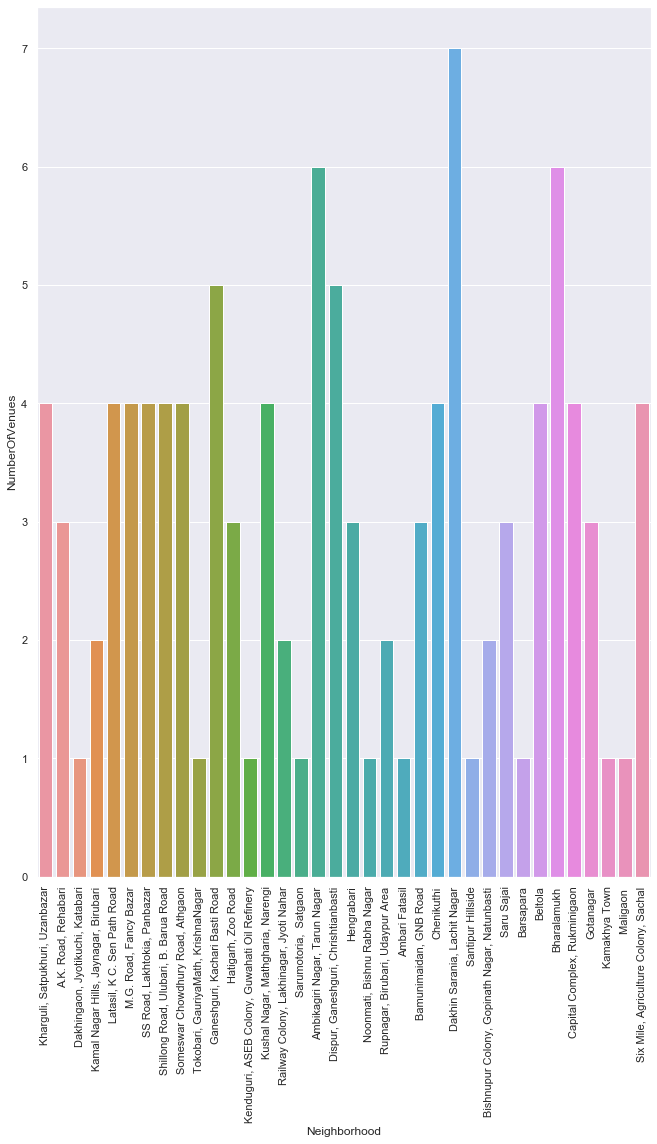

In [52]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_ghy_venue_count)
plot.set_xticklabels(individual_ghy_venue_count['Neighborhood'],rotation=90)

From the above graph we can see that Lachit Nagar has most number of venues followed by Ambikagiri Nagar and Bharalamukh and soo on...

#### Exploring Dispur,Ganeshguri,Chrishtianbasti venues

In [53]:
ghy_venues[ghy_venues['Neighborhood']=='Dispur, Ganeshguri, Chrishtianbasti']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
26,"Dispur, Ganeshguri, Chrishtianbasti",Lakhra,26.1531,91.777,Confucius,26.157123,91.776958,Chinese Restaurant
27,"Dispur, Ganeshguri, Chrishtianbasti",Lakhra,26.1531,91.777,KFC,26.154148,91.779765,Fast Food Restaurant
28,"Dispur, Ganeshguri, Chrishtianbasti",Lakhra,26.1531,91.777,Sohum,26.155342,91.779523,Clothing Store
29,"Dispur, Ganeshguri, Chrishtianbasti",Lakhra,26.1531,91.777,Wills Lifestyle,26.156392,91.777920,Clothing Store
30,"Dispur, Ganeshguri, Chrishtianbasti",Lakhra,26.1531,91.777,Central Mall,26.156093,91.778798,Shopping Mall


#### One hot encoding for letting us to compare different venues based on some common scale

In [54]:
ghy_venues_onehot = pd.get_dummies(ghy_venues[['Venue Category']])

In [55]:
ghy_venues_onehot

,Venue Category_ATM,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Boutique,Venue Category_Buffet,Venue Category_Café,Venue Category_Chinese Restaurant,...,Venue Category_Restaurant,Venue Category_River,Venue Category_Scenic Lookout,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_Track,Venue Category_Track Stadium,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
ghy_venues_onehot['Neighborhood'] = ghy_venues['Neighborhood']
ghy_venues_grouped = ghy_venues_onehot.groupby('Neighborhood').mean().reset_index()
ghy_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Boutique,Venue Category_Buffet,Venue Category_Café,...,Venue Category_Restaurant,Venue Category_River,Venue Category_Scenic Lookout,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_Track,Venue Category_Track Stadium,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Zoo
0,"A.K. Road, Rehabari",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,Ambari Fatasil,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,"Ambikagiri Nagar, Tarun Nagar",0.00,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.00,0.000000,0.166667
3,"Bamunimaidan, GNB Road",0.00,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.666667,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,Barsapara,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,Beltola,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
6,Bharalamukh,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,...,0.0,0.166667,0.0,0.000000,0.166667,0.000000,0.000000,0.00,0.000000,0.000000
7,"Bishnupur Colony, Gopinath Nagar, Natunbasti",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,"Capital Complex, Rukminigaon",0.00,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.000000
9,Chenikuthi,0.00,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000


In [57]:
number_of_top_venues = 3

In [58]:
for hood in ghy_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = ghy_venues_grouped[ghy_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- A.K. Road, Rehabari ---------
                                   Venue  Frequency
0             Venue Category_Pizza Place       0.33
1  Venue Category_Furniture / Home Store       0.33
2             Venue Category_Coffee Shop       0.33


--------- Ambari Fatasil ---------
                                  Venue  Frequency
0  Venue Category_Outdoors & Recreation        1.0
1                    Venue Category_ATM        0.0
2       Venue Category_Asian Restaurant        0.0


--------- Ambikagiri Nagar, Tarun Nagar ---------
                 Venue  Frequency
0   Venue Category_Zoo       0.17
1   Venue Category_Bar       0.17
2  Venue Category_Park       0.17


--------- Bamunimaidan, GNB Road ---------
                 Venue  Frequency
0  Venue Category_Café       0.67
1  Venue Category_Bank       0.33
2   Venue Category_ATM       0.00


--------- Barsapara ---------
                              Venue  Frequency
0  Venue Category_Recreation Center        1.0
1               

In [59]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [61]:
number_of_top_venues=5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ghy_venues_grouped['Neighborhood']

for ind in np.arange(ghy_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ghy_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"A.K. Road, Rehabari",Venue Category_Furniture / Home Store,Venue Category_Coffee Shop,Venue Category_Pizza Place,Venue Category_Zoo,Venue Category_Department Store
1,Ambari Fatasil,Venue Category_Outdoors & Recreation,Venue Category_Zoo,Venue Category_Indian Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel
2,"Ambikagiri Nagar, Tarun Nagar",Venue Category_Zoo,Venue Category_Asian Restaurant,Venue Category_Park,Venue Category_Track,Venue Category_Pizza Place
3,"Bamunimaidan, GNB Road",Venue Category_Café,Venue Category_Bank,Venue Category_Zoo,Venue Category_Diner,Venue Category_Ice Cream Shop
4,Barsapara,Venue Category_Recreation Center,Venue Category_Zoo,Venue Category_Department Store,Venue Category_Hotel Bar,Venue Category_Hotel


In [62]:
neighborhoods_venues_sorted.shape

(36, 6)

### Finding the optimal k value for clustering using the elbow method

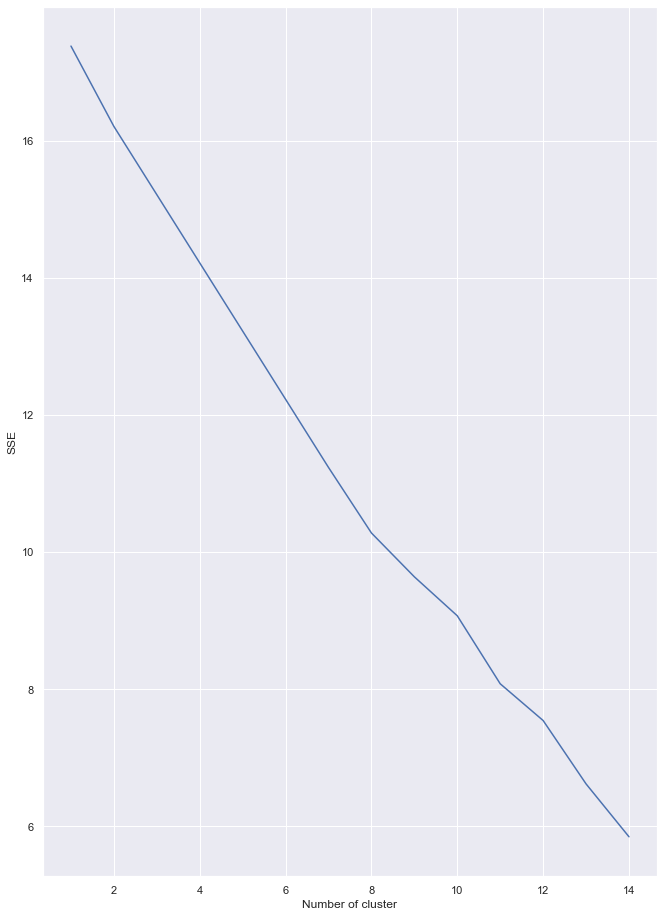

In [63]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(ghy_venues_grouped.drop('Neighborhood',axis=1))
    ghy_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### From the above graph, we can see the optimal value for cluster is 8

In [64]:
kmeans = KMeans(n_clusters=8,random_state=0)

In [65]:
kmeans.fit(ghy_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [66]:
ghy_venues_grouped['Cluster'] = kmeans.labels_

In [67]:
ghy_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0     5
1     2
2     9
3    10
4     3
5     3
6     3
7     1
Name: Neighborhood, dtype: int64

In [68]:
ghy_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM', 'Venue Category_Asian Restaurant',
       'Venue Category_Athletics & Sports', 'Venue Category_Bakery',
       'Venue Category_Bank', 'Venue Category_Bar', 'Venue Category_Boutique',
       'Venue Category_Buffet', 'Venue Category_Café',
       'Venue Category_Chinese Restaurant', 'Venue Category_Clothing Store',
       'Venue Category_Coffee Shop', 'Venue Category_Cruise',
       'Venue Category_Department Store', 'Venue Category_Diner',
       'Venue Category_Electronics Store', 'Venue Category_Farm',
       'Venue Category_Fast Food Restaurant', 'Venue Category_Fish Market',
       'Venue Category_Flea Market', 'Venue Category_Food Court',
       'Venue Category_Furniture / Home Store',
       'Venue Category_Health & Beauty Service', 'Venue Category_Hotel',
       'Venue Category_Hotel Bar', 'Venue Category_Ice Cream Shop',
       'Venue Category_Indian Restaurant', 'Venue Category_Market',
       'Venue Category_Medical Supply Store',
 

In [69]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(ghy_venues_grouped,on='Neighborhood')

In [70]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue Category_ATM,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Bakery,...,Venue Category_River,Venue Category_Scenic Lookout,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_Track,Venue Category_Track Stadium,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Zoo,Cluster
0,"A.K. Road, Rehabari",Venue Category_Furniture / Home Store,Venue Category_Coffee Shop,Venue Category_Pizza Place,Venue Category_Zoo,Venue Category_Department Store,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,4
1,Ambari Fatasil,Venue Category_Outdoors & Recreation,Venue Category_Zoo,Venue Category_Indian Restaurant,Venue Category_Hotel Bar,Venue Category_Hotel,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1
2,"Ambikagiri Nagar, Tarun Nagar",Venue Category_Zoo,Venue Category_Asian Restaurant,Venue Category_Park,Venue Category_Track,Venue Category_Pizza Place,0.0,0.166667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.166667,3
3,"Bamunimaidan, GNB Road",Venue Category_Café,Venue Category_Bank,Venue Category_Zoo,Venue Category_Diner,Venue Category_Ice Cream Shop,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0


In [72]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(ghy_venues,on='Neighborhood')

In [84]:
# create map
map_clusters = folium.Map(location=[ghy_latitude, ghy_longitude], zoom_start=12)

In [85]:
# set color scheme for the clusters
x = np.arange(10)
ys = [i + x + (i*x)**2 for i in range(10)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [86]:
map_clusters

### Finding similar locations based on user input (recommending location)

We need to analyze factors such as population and Income to recommend.

In [87]:
ghy_income.head()

,Borough,Neighborhoods,AverageIncome
0,West,Jalukbari,26872
1,West,Ferryghat Colony,10123
2,West,Maligaon,32343
3,West,Adabari,29123
4,West,Kamakhya Town,30345


In [89]:
ghy_population.head()

,Borough,Neighborhoods,Population
0,West,Jalukbari,20555
1,West,Ferryghat Colony,72045
2,West,Maligaon,26456
3,West,Adabari,21421
4,West,Kamakhya Town,18623


In [90]:
ghy_population['Normalized_population'] = ghy_population['Population']/ghy_population['Population'].max(axis=0)
ghy_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,West,Jalukbari,20555,0.285308
1,West,Ferryghat Colony,72045,1.000000
2,West,Maligaon,26456,0.367215
3,West,Adabari,21421,0.297328
4,West,Kamakhya Town,18623,0.258491


In [91]:
ghy_income['Normalized_income'] = ghy_income['AverageIncome']/ghy_income['AverageIncome'].max(axis=0)
ghy_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,West,Jalukbari,26872,0.334737
1,West,Ferryghat Colony,10123,0.126099
2,West,Maligaon,32343,0.402887
3,West,Adabari,29123,0.362777
4,West,Kamakhya Town,30345,0.377999


In [93]:
ghy_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Boutique,Venue Category_Buffet,Venue Category_Café,...,Venue Category_River,Venue Category_Scenic Lookout,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_Track,Venue Category_Track Stadium,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Zoo,Cluster
0,"A.K. Road, Rehabari",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


recommending Veg restaurants

In [95]:
ghy_veg = ghy_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
ghy_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Boutique,Venue Category_Buffet,Venue Category_Café,...,Venue Category_Restaurant,Venue Category_River,Venue Category_Scenic Lookout,Venue Category_Shopping Mall,Venue Category_Snack Place,Venue Category_Track,Venue Category_Track Stadium,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Zoo
0,"A.K. Road, Rehabari",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ambari Fatasil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Ambikagiri Nagar, Tarun Nagar",0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,"Bamunimaidan, GNB Road",0,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,Barsapara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
ghy_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
Name: Venue Category_Vegetarian / Vegan Restaurant, dtype: uint8

In [97]:
ghy_veg = ghy_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [98]:
ghy_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [99]:
ghy_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,"A.K. Road, Rehabari",0
1,Ambari Fatasil,0
2,"Ambikagiri Nagar, Tarun Nagar",0
3,"Bamunimaidan, GNB Road",0
4,Barsapara,0


In [100]:
ghy_veg['NumberOfNonVeganrestaurants'] = 1-(ghy_veg['NumberOfVegRestaurants']/ghy_veg['NumberOfVegRestaurants'].max(axis=0))

In [101]:
ghy_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,"A.K. Road, Rehabari",0,1.0
1,Ambari Fatasil,0,1.0
2,"Ambikagiri Nagar, Tarun Nagar",0,1.0
3,"Bamunimaidan, GNB Road",0,1.0
4,Barsapara,0,1.0
5,Beltola,0,1.0
6,Bharalamukh,0,1.0
7,"Bishnupur Colony, Gopinath Nagar, Natunbasti",0,1.0
8,"Capital Complex, Rukminigaon",0,1.0
9,Chenikuthi,0,1.0


In [103]:
ghy_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

#### Building a target neighborhood by providing a sample restaurant : say ' Dispur, Ganeshguri, Chrishtianbasti '

In [104]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Dispur, Ganeshguri, Chrishtianbasti']

In [105]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue Category_ATM,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,...,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Zoo,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,42,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,...,0.0,0.0,6,Lakhra,26.1531,91.777,Confucius,26.157123,91.776958,Chinese Restaurant
1,43,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,...,0.0,0.0,6,Lakhra,26.1531,91.777,KFC,26.154148,91.779765,Fast Food Restaurant
2,44,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,...,0.0,0.0,6,Lakhra,26.1531,91.777,Sohum,26.155342,91.779523,Clothing Store
3,45,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,...,0.0,0.0,6,Lakhra,26.1531,91.777,Wills Lifestyle,26.156392,91.777920,Clothing Store
4,46,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,...,0.0,0.0,6,Lakhra,26.1531,91.777,Central Mall,26.156093,91.778798,Shopping Mall


In [107]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [108]:
target_cluster

6

In [109]:
print("The target cluster is : ",target_cluster)

The target cluster is :  6


In [110]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue Category_ATM,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Bakery,...,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Zoo,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
24,"Bishnupur Colony, Gopinath Nagar, Natunbasti",Venue Category_Hotel,Venue Category_Clothing Store,Venue Category_Zoo,Venue Category_Diner,Venue Category_Ice Cream Shop,0.0,0.0,0.0,0.0,...,0.0,0.0,6,South,26.1499,91.7399,V-Mart,26.149585,91.741063,Clothing Store
25,"Bishnupur Colony, Gopinath Nagar, Natunbasti",Venue Category_Hotel,Venue Category_Clothing Store,Venue Category_Zoo,Venue Category_Diner,Venue Category_Ice Cream Shop,0.0,0.0,0.0,0.0,...,0.0,0.0,6,South,26.1499,91.7399,Hotel VIP International,26.152347,91.740576,Hotel
42,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,0.0,...,0.0,0.0,6,Lakhra,26.1531,91.7770,Confucius,26.157123,91.776958,Chinese Restaurant
43,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,0.0,...,0.0,0.0,6,Lakhra,26.1531,91.7770,KFC,26.154148,91.779765,Fast Food Restaurant
44,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,0.0,...,0.0,0.0,6,Lakhra,26.1531,91.7770,Sohum,26.155342,91.779523,Clothing Store


In [112]:
print("There are {} neighborhoods which has similar characteristics to Dispur, Ganeshguri, Chrishtianbasti.".format(possible_neighborhoods.shape[0]))

There are 8 neighborhoods which has similar characteristics to Dispur, Ganeshguri, Chrishtianbasti.


In [114]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue Category_ATM,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,...,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Zoo,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,24,"Bishnupur Colony, Gopinath Nagar, Natunbasti",Venue Category_Hotel,Venue Category_Clothing Store,Venue Category_Zoo,Venue Category_Diner,Venue Category_Ice Cream Shop,0.0,0.0,0.0,...,0.0,0.0,6,South,26.1499,91.7399,V-Mart,26.149585,91.741063,Clothing Store
1,25,"Bishnupur Colony, Gopinath Nagar, Natunbasti",Venue Category_Hotel,Venue Category_Clothing Store,Venue Category_Zoo,Venue Category_Diner,Venue Category_Ice Cream Shop,0.0,0.0,0.0,...,0.0,0.0,6,South,26.1499,91.7399,Hotel VIP International,26.152347,91.740576,Hotel
2,42,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,...,0.0,0.0,6,Lakhra,26.1531,91.7770,Confucius,26.157123,91.776958,Chinese Restaurant
3,43,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,...,0.0,0.0,6,Lakhra,26.1531,91.7770,KFC,26.154148,91.779765,Fast Food Restaurant
4,44,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,...,0.0,0.0,6,Lakhra,26.1531,91.7770,Sohum,26.155342,91.779523,Clothing Store


In [115]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Now we need to create ranking by combining population and income factors as well?**

In [116]:
possible_neighborhoods = possible_neighborhoods.merge(ghy_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(ghy_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(ghy_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [117]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue Category_ATM,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Bakery,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,"Bishnupur Colony, Gopinath Nagar, Natunbasti",Venue Category_Hotel,Venue Category_Clothing Store,Venue Category_Zoo,Venue Category_Diner,Venue Category_Ice Cream Shop,0.0,0.0,0.0,0.0,...,V-Mart,26.149585,91.741063,Clothing Store,18123,0.251551,21765,0.271120,0,1.0
1,"Bishnupur Colony, Gopinath Nagar, Natunbasti",Venue Category_Hotel,Venue Category_Clothing Store,Venue Category_Zoo,Venue Category_Diner,Venue Category_Ice Cream Shop,0.0,0.0,0.0,0.0,...,Hotel VIP International,26.152347,91.740576,Hotel,18123,0.251551,21765,0.271120,0,1.0
2,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,0.0,...,Confucius,26.157123,91.776958,Chinese Restaurant,20543,0.285141,30000,0.373701,0,1.0
3,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,0.0,...,KFC,26.154148,91.779765,Fast Food Restaurant,20543,0.285141,30000,0.373701,0,1.0
4,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,0.0,...,Sohum,26.155342,91.779523,Clothing Store,20543,0.285141,30000,0.373701,0,1.0


In [119]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [121]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue Category_ATM,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Bakery,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,0.0,...,26.157123,91.776958,Chinese Restaurant,20543,0.285141,30000,0.373701,0,1.0,0.373366
1,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,0.0,...,26.154148,91.779765,Fast Food Restaurant,20543,0.285141,30000,0.373701,0,1.0,0.373366
2,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,0.0,...,26.155342,91.779523,Clothing Store,20543,0.285141,30000,0.373701,0,1.0,0.373366
3,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,0.0,...,26.156392,91.777920,Clothing Store,20543,0.285141,30000,0.373701,0,1.0,0.373366
4,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant,Venue Category_Zoo,0.0,0.0,0.0,0.0,...,26.156093,91.778798,Shopping Mall,20543,0.285141,30000,0.373701,0,1.0,0.373366


In [122]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [123]:
top3_df = pd.DataFrame(top3).reset_index()

In [124]:
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,"Bishnupur Colony, Gopinath Nagar, Natunbasti",Venue Category_Hotel,Venue Category_Clothing Store,Venue Category_Zoo,[0.3206676818096672]
1,"Dispur, Ganeshguri, Chrishtianbasti",Venue Category_Clothing Store,Venue Category_Shopping Mall,Venue Category_Fast Food Restaurant,[0.3733661012747169]
2,"Tokobari, GauriyaMath, KrishnaNagar",Venue Category_Clothing Store,Venue Category_Zoo,Venue Category_Diner,[0.24348350807199406]


**Here, according the data, we see that 'Bisnupur Colony and Tokobari, KrishnaNagar' are top 2 neighborhoods to find similar food to Dispur, Ganeshguri, Chrishtianbasti restaurant's veg food !**

**Here our model will recommend these neighborneeds and top 2 common venues to visit.**

# THANK YOU